# Stock Market Analysis - Data Project 2 from Data Visualization with Python course

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

For the second project, we'll be looking at technology stocks (and potentially cryptocurrency). In this project, you'll learn to use pandas to get stock information, visualize different aspects of it, such as: analyzing the risk of a stock based on its previous performance history and projecting the future stock prices through a Monte Carlo method.

We'll need to answer the following questions by the end of this project:

1) What was the moving average of the various stocks?

2) What was the daily return of the stock on average?

3) What was the change in the stock's price over time?

4) What was the correlation between different stocks' closing prices?

5) What was the correlation between different stocks' daily returns?

6) How much value do we put at risk by investing in a particular stock?

7) How can we attempt to predict future stock behavior?

## How to request stock information with pandas and analyze basic attributes of that stock

In [4]:
import pandas_datareader as pdr

In [5]:
from datetime import datetime

With everything you need imported to this notebook, create a list containing all the ticker names of the companys you want to request stock information from.

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN','SONY','TSLA','XELA','DMGI.V']

Set-up the end and start dates for the timeframe you wish to look at. The timeframe I want to look at is 5 months before the present date. To do this, you can subtract 5 from today's current month. This does not work if the current month is less than the number you are subtracting (would have to change manually or create a function that can check this condition if it arises.)

Because of this, I've decided to make a function that can flexibly adjust the start date so this error doesn't occur. This way, you won't have to manually input the start date every time you want to see stock information.

In [7]:
def monthly_time_windows(year=datetime.now().year,month=0,
                     day=(datetime.now().day)):
    """Must import datetime.datetime into notebook/command prompt
    for function to work properly.
    
    This function can take in a year, month, and day you wish to subtract
    from the present date to establish a start time that adjusts
    automatically, regardless of when the present date is.
    
    It will check to see if subtracting a number greater than the 
    timeframe you wish to view results in changing the year/month 
    by subtracting one from either of those variables. 
    
    This allows for flexible adjustments that don't require manual input 
    every time you want to view stock information. 
    
    The default is the current date. The month input must be
    less than or equal to 11.
    
    The output will be the datetime with the specified year, month and day.
    """
    
    today = datetime.now()
    
    # For monthly based time-windows:
    if (today.month - month) <=0:
        start_year = year - 1
        start_month = 12 + (today.month - month)
        return datetime(start_year,start_month,day)
    elif (today.month - month) >0:
        start_month = (today.month - month)
        return datetime(year,start_month,day)

In [8]:
end = monthly_time_windows()
start = monthly_time_windows(month=6)

To make sure this worked:

In [9]:
end

datetime.datetime(2021, 6, 20, 0, 0)

In [10]:
start

datetime.datetime(2020, 12, 20, 0, 0)

Here is a dataframe containing all the stock information of the all tech companies. This can be used to compare stock information of several companies using this specific dataframe.

In [11]:
df = pdr.data.get_data_yahoo(tech_list,start,end)
df.head()

Attributes   Adj Close                                                   \
Symbols           AAPL         GOOG        MSFT         AMZN       SONY   
Date                                                                      
2020-12-21  127.821548  1739.369995  221.566895  3206.179932  99.400002   
2020-12-22  131.459930  1723.500000  222.910690  3206.520020  97.459999   
2020-12-23  130.542862  1732.380005  220.004105  3185.270020  97.459999   
2020-12-24  131.549637  1738.849976  221.726166  3172.689941  96.839996   
2020-12-28  136.254608  1776.089966  223.925995  3283.959961  97.949997   

Attributes                                 Close               ...   Open  \
Symbols           TSLA   XELA DMGI.V        AAPL         GOOG  ...   XELA   
Date                                                           ...          
2020-12-21  649.859985  1.299   0.72  128.229996  1739.369995  ...  1.308   
2020-12-22  640.340027  1.206   0.71  131.880005  1723.500000  ...  1.221   
2020-12-23  645.979980  1.338   0.59  130.960007  1732.380005  ...  1.233   
2020-12-24  661.770020  1.329   0.57  131.970001  1738.849976  ...  1.410   
2020-12-28  663.690002  1.257    NaN  136.690002  1776.089966  ...  1.371   

Attributes              Volume                                              \
Symbols    DMGI.V         AAPL       GOOG        MSFT       AMZN      SONY   
Date                                                                         
2020-12-21   0.70  121251600.0  1828400.0  37181900.0  3836800.0  939000.0   
2020-12-22   0.77  168904800.0   936700.0  22612200.0  2369400.0  743000.0   
2020-12-23   0.72   88223700.0  1033800.0  18699600.0  2093800.0  669600.0   
2020-12-24   0.59   54930100.0   346800.0  10550600.0  1451900.0  301800.0   
2020-12-28    NaN  124486200.0  1393000.0  17933500.0  5686800.0  963600.0   

Attributes                                    
Symbols           TSLA       XELA     DMGI.V  
Date                                          
2020-12-21  58045300.0  3225733.0  2635000.0  
2020-12-22  51716000.0  2035467.0  2234500.0  
2020-12-23  33173000.0  4612800.0  2371400.0  
2020-12-24  22865600.0  1833767.0  1348100.0  
2020-12-28  32278600.0  1785967.0        NaN  

[5 rows x 48 columns]

You can also make global variables you can call by using a for loop on the tech_list. This creates a dataframe for each companys' stock information, and can be used to apply the .describe() method for analyzing the statistical values of each companys' stock.

In [12]:
for stock in tech_list:
    globals()[stock] = pdr.data.get_data_yahoo(stock,start,end)

Now, if you call one of the strings in the tech list as you would call a variable, it will output the dataframe of that stock.

In [13]:
AAPL

High         Low        Open       Close       Volume  \
Date                                                                      
2020-12-21  128.309998  123.449997  125.019997  128.229996  121251600.0   
2020-12-22  134.410004  129.649994  131.610001  131.880005  168904800.0   
2020-12-23  132.429993  130.779999  132.160004  130.960007   88223700.0   
2020-12-24  133.460007  131.100006  131.320007  131.970001   54930100.0   
2020-12-28  137.339996  133.509995  133.990005  136.690002  124486200.0   
...                ...         ...         ...         ...          ...   
2021-06-14  130.539993  127.070000  127.820000  130.479996   96906500.0   
2021-06-15  130.600006  129.389999  129.940002  129.639999   62746300.0   
2021-06-16  130.889999  128.460007  130.369995  130.149994   91815000.0   
2021-06-17  132.550003  129.649994  129.800003  131.789993   96721700.0   
2021-06-18  131.509995  130.240005  130.710007  130.460007  108787300.0   

             Adj Close  
Date                    
2020-12-21  127.821548  
2020-12-22  131.459930  
2020-12-23  130.542862  
2020-12-24  131.549637  
2020-12-28  136.254608  
...                ...  
2021-06-14  130.479996  
2021-06-15  129.639999  
2021-06-16  130.149994  
2021-06-17  131.789993  
2021-06-18  130.460007  

[124 rows x 6 columns]

In [14]:
AAPL.describe()

High         Low        Open       Close        Volume  \
count  124.000000  124.000000  124.000000  124.000000  1.240000e+02   
mean   130.323146  127.420564  128.977984  128.863871  9.889581e+07   
std      5.448057    5.297594    5.482180    5.423959  2.855111e+07   
min    120.400002  116.209999  119.029999  116.360001  5.352240e+07   
25%    126.160004  123.369997  124.680000  125.105001  7.889435e+07   
50%    130.195000  126.970001  128.580002  128.514999  9.250790e+07   
75%    134.687500  131.675003  133.512497  133.027500  1.119174e+08   
max    145.089996  141.369995  143.600006  143.160004  1.855495e+08   

        Adj Close  
count  124.000000  
mean   128.647747  
std      5.354838  
min    116.162689  
25%    125.037498  
50%    128.136265  
75%    132.801929  
max    142.704010

You can make some box/violin plots with this information.

In [15]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2020-12-21 to 2021-06-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       124 non-null    float64
 1   Low        124 non-null    float64
 2   Open       124 non-null    float64
 3   Close      124 non-null    float64
 4   Volume     124 non-null    float64
 5   Adj Close  124 non-null    float64
dtypes: float64(6)
memory usage: 6.8 KB


<AxesSubplot:xlabel='Date'>

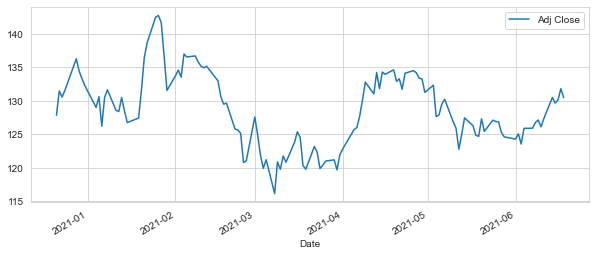

In [16]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

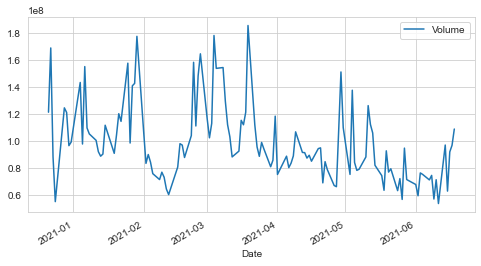

In [17]:
AAPL['Volume'].plot(legend=True, figsize = (8,4))

The 1e8 means the scale is the value on the y-axis times 10 to the power of 8.

## What was the moving average of the various stocks?

The moving average is summing together all the prices within a certain timeframe and dividing by the number of prices you summed together. 

For example, if you wanted to determine the moving average of a 6 month time period, and wanted to count by each day, you would sum all the closing prices within the 6 month time period you want to view, then divide by the total number of days in that time window.

Let's look at several different moving day averages. Let's do a 10-day, 20-day, and 50-day moving average:

In [18]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [19]:
AAPL

High         Low        Open       Close       Volume  \
Date                                                                      
2020-12-21  128.309998  123.449997  125.019997  128.229996  121251600.0   
2020-12-22  134.410004  129.649994  131.610001  131.880005  168904800.0   
2020-12-23  132.429993  130.779999  132.160004  130.960007   88223700.0   
2020-12-24  133.460007  131.100006  131.320007  131.970001   54930100.0   
2020-12-28  137.339996  133.509995  133.990005  136.690002  124486200.0   
...                ...         ...         ...         ...          ...   
2021-06-14  130.539993  127.070000  127.820000  130.479996   96906500.0   
2021-06-15  130.600006  129.389999  129.940002  129.639999   62746300.0   
2021-06-16  130.889999  128.460007  130.369995  130.149994   91815000.0   
2021-06-17  132.550003  129.649994  129.800003  131.789993   96721700.0   
2021-06-18  131.509995  130.240005  130.710007  130.460007  108787300.0   

             Adj Close  MA for 10 days  MA for 20 days  MA for 50 days  
Date                                                                    
2020-12-21  127.821548             NaN             NaN             NaN  
2020-12-22  131.459930             NaN             NaN             NaN  
2020-12-23  130.542862             NaN             NaN             NaN  
2020-12-24  131.549637             NaN             NaN             NaN  
2020-12-28  136.254608             NaN             NaN             NaN  
...                ...             ...             ...             ...  
2021-06-14  130.479996      126.247999      126.088499      128.757320  
2021-06-15  129.639999      126.783999      126.256999      128.836390  
2021-06-16  130.149994      127.292999      126.521999      128.919470  
2021-06-17  131.789993      128.117998      126.876999      129.001608  
2021-06-18  130.460007      128.574998      127.034499      129.008029  

[124 rows x 9 columns]

This can't do a moving average of the first 9, 19, and 49 days for the 10-day, 20-day, and 50-day moving averages, respectively.

<AxesSubplot:xlabel='Date'>

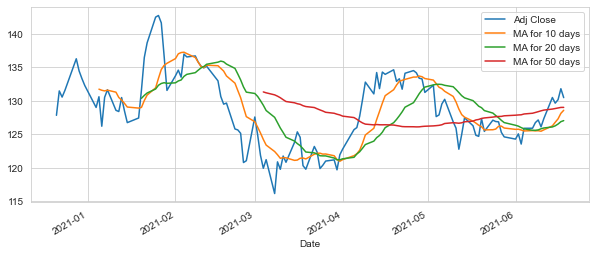

In [20]:
AAPL[['Adj Close','MA for 10 days',
      'MA for 20 days','MA for 50 days']].plot(subplots=False,figsize = (10,4))

The plotting function can bypass the null values. The subplots=False argument allows for all these columns to be plotted on the graph. If True, each column is graphed on its own plot and they are stacked together as a subplot.

Notice that the smaller the time frame for the moving average, the more sporadic the trends tend to be.

In [21]:
tech_list

['AAPL', 'GOOG', 'MSFT', 'AMZN', 'SONY', 'TSLA', 'XELA', 'DMGI.V']

In [22]:
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    GOOG[column_name] = GOOG['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

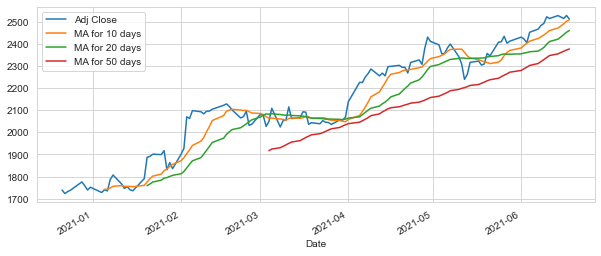

In [23]:
GOOG[['Adj Close','MA for 10 days',
      'MA for 20 days','MA for 50 days']].plot(subplots=False,figsize = (10,4))

<AxesSubplot:xlabel='Date'>

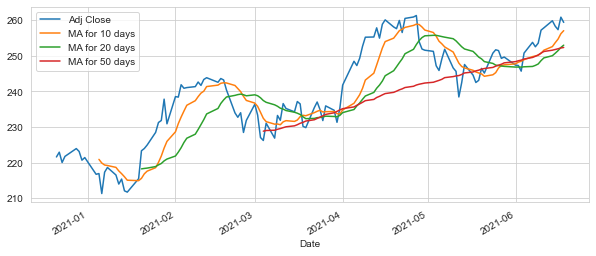

In [24]:
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    MSFT[column_name] = MSFT['Adj Close'].rolling(ma).mean()
    
MSFT[['Adj Close','MA for 10 days',
      'MA for 20 days','MA for 50 days']].plot(subplots=False,figsize = (10,4))

<AxesSubplot:xlabel='Date'>

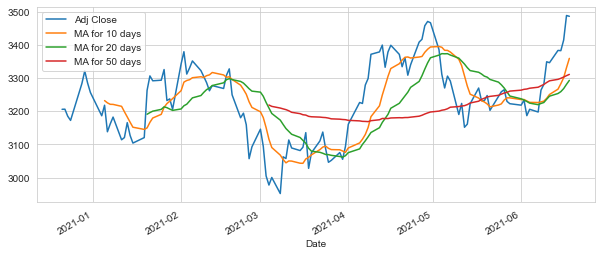

In [25]:
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    AMZN[column_name] = AMZN['Adj Close'].rolling(ma).mean()
    
AMZN[['Adj Close','MA for 10 days',
      'MA for 20 days','MA for 50 days']].plot(subplots=False,figsize = (10,4))

<AxesSubplot:xlabel='Date'>

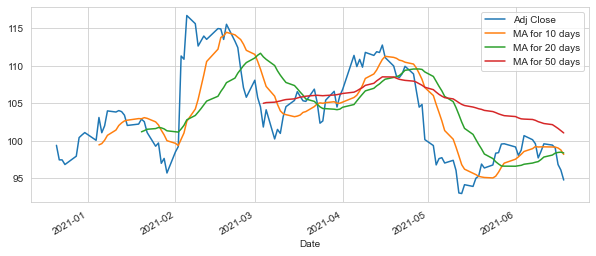

In [26]:
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    SONY[column_name] = SONY['Adj Close'].rolling(ma).mean()
    
SONY[['Adj Close','MA for 10 days',
      'MA for 20 days','MA for 50 days']].plot(subplots=False,figsize = (10,4))

<AxesSubplot:xlabel='Date'>

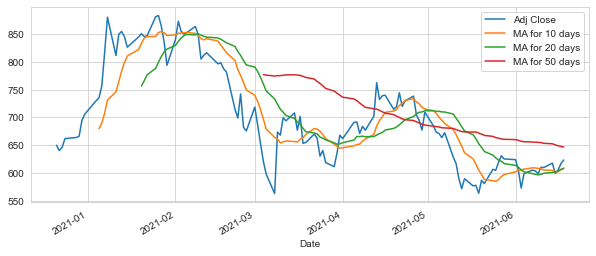

In [27]:
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    TSLA[column_name] = TSLA['Adj Close'].rolling(ma).mean()
    
TSLA[['Adj Close','MA for 10 days',
      'MA for 20 days','MA for 50 days']].plot(subplots=False,figsize = (10,4))

<AxesSubplot:xlabel='Date'>

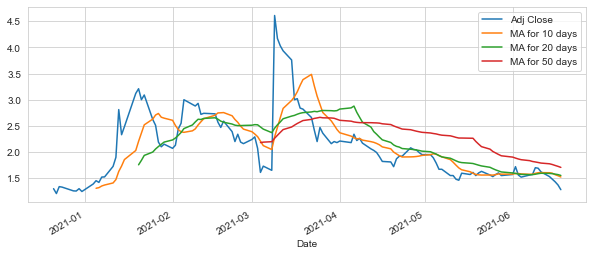

In [28]:
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    XELA[column_name] = XELA['Adj Close'].rolling(ma).mean()
    
XELA[['Adj Close','MA for 10 days',
      'MA for 20 days','MA for 50 days']].plot(subplots=False,figsize = (10,4))

DMGI.V is a little trickier, as IPython doesn't recognize it as a global variable. Use the dataframe that contains all of the companys' stock info, and make a new dataframe that has the moving average for this company.

In [29]:
DMGI = DataFrame(df['Adj Close']['DMGI.V'])
DMGI

DMGI.V
Date              
2020-12-21    0.72
2020-12-22    0.71
2020-12-23    0.59
2020-12-24    0.57
2020-12-28     NaN
...            ...
2021-06-14    0.90
2021-06-15    0.88
2021-06-16    0.86
2021-06-17    0.84
2021-06-18    0.83

[126 rows x 1 columns]

<AxesSubplot:xlabel='Date'>

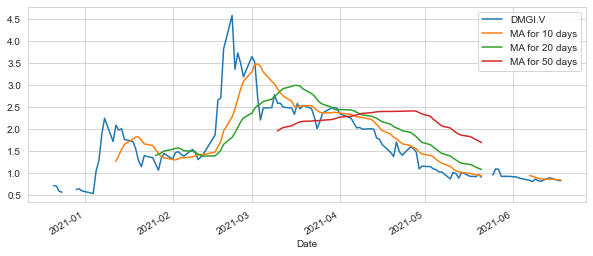

In [30]:
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    DMGI[column_name] = DMGI['DMGI.V'].rolling(ma).mean()
    
DMGI[['DMGI.V','MA for 10 days',
      'MA for 20 days','MA for 50 days']].plot(subplots=False,figsize = (10,4))

## What was your daily returns of the stock on average?

You can determine the daily return by applying the .pct_change() function to the adjusted closing price of each stock:

In [31]:
tech_list

['AAPL', 'GOOG', 'MSFT', 'AMZN', 'SONY', 'TSLA', 'XELA', 'DMGI.V']

<AxesSubplot:xlabel='Date'>

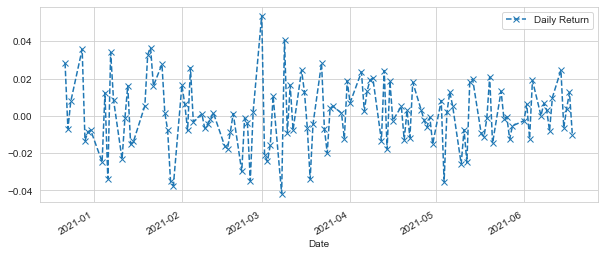

In [32]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='x')

<AxesSubplot:xlabel='Date'>

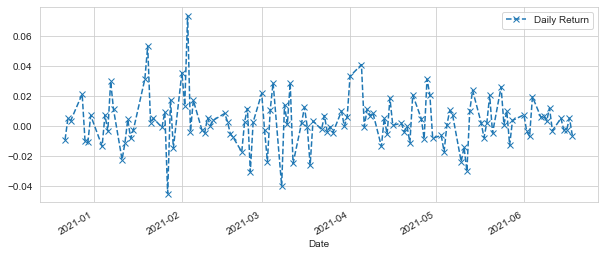

In [33]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()

GOOG['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='x')

<AxesSubplot:xlabel='Date'>

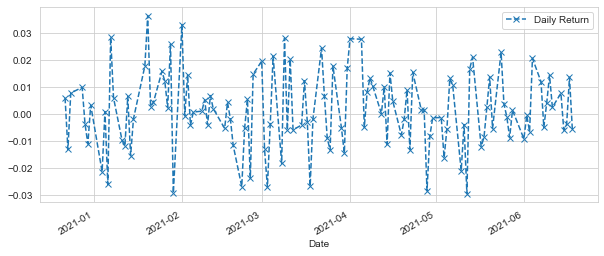

In [34]:
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()

MSFT['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='x')

<AxesSubplot:xlabel='Date'>

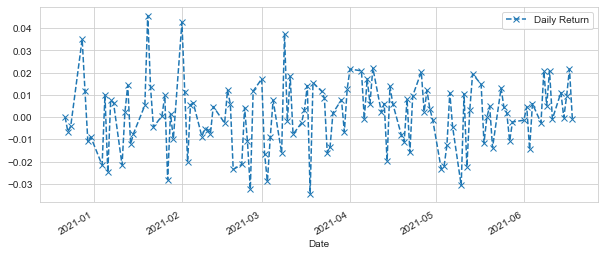

In [35]:
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()

AMZN['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='x')

<AxesSubplot:xlabel='Date'>

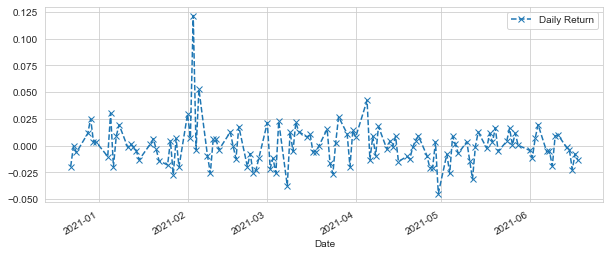

In [36]:
SONY['Daily Return'] = SONY['Adj Close'].pct_change()

SONY['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='x')

<AxesSubplot:xlabel='Date'>

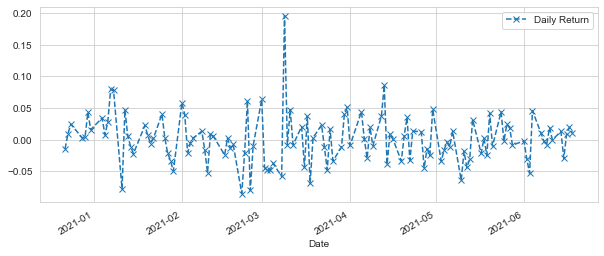

In [37]:
TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()

TSLA['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='x')

<AxesSubplot:xlabel='Date'>

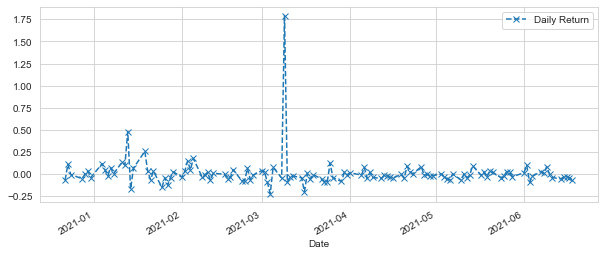

In [38]:
XELA['Daily Return'] = XELA['Adj Close'].pct_change()

XELA['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='x')

<AxesSubplot:xlabel='Date'>

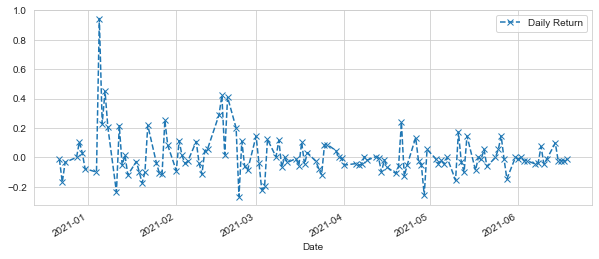

In [39]:
DMGI['Daily Return'] = DMGI['DMGI.V'].pct_change()

DMGI['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='x')

Looking at this data, we can see that for larger companies, the daily returns fluctuate much less than for companies with much cheaper stocks. It might be important to key in on the spikes in these plots (both the negative and positive returns) in order to understand why they may have occurred and to predict when to buy stock at very low daily returns, or to sell stocks when the daily returns are much higher than usual.

You can use histograms (with Seaborn) on this information to determine the risk of these stocks.

## What was the correlation between different stocks' daily returns?

Let's compare companies to see how they're daily returns stack up against one another:

In [40]:
closing_df = df['Adj Close']
closing_df

Symbols           AAPL         GOOG        MSFT         AMZN       SONY  \
Date                                                                      
2020-12-21  127.821548  1739.369995  221.566895  3206.179932  99.400002   
2020-12-22  131.459930  1723.500000  222.910690  3206.520020  97.459999   
2020-12-23  130.542862  1732.380005  220.004105  3185.270020  97.459999   
2020-12-24  131.549637  1738.849976  221.726166  3172.689941  96.839996   
2020-12-28  136.254608  1776.089966  223.925995  3283.959961  97.949997   
...                ...          ...         ...          ...        ...   
2021-06-14  130.479996  2527.040039  259.890015  3383.870117  99.430000   
2021-06-15  129.639999  2520.659912  258.359985  3383.129883  99.050003   
2021-06-16  130.149994  2513.929932  257.380005  3415.250000  96.839996   
2021-06-17  131.789993  2527.419922  260.899994  3489.239990  96.099998   
2021-06-18  130.460007  2511.350098  259.429993  3486.899902  94.769997   

Symbols           TSLA   XELA  DMGI.V  
Date                                   
2020-12-21  649.859985  1.299    0.72  
2020-12-22  640.340027  1.206    0.71  
2020-12-23  645.979980  1.338    0.59  
2020-12-24  661.770020  1.329    0.57  
2020-12-28  663.690002  1.257     NaN  
...                ...    ...     ...  
2021-06-14  617.690002  1.530    0.90  
2021-06-15  599.359985  1.480    0.88  
2021-06-16  604.869995  1.430    0.86  
2021-06-17  616.599976  1.370    0.84  
2021-06-18  623.309998  1.280    0.83  

[126 rows x 8 columns]

In [41]:
tech_rets = closing_df.pct_change()

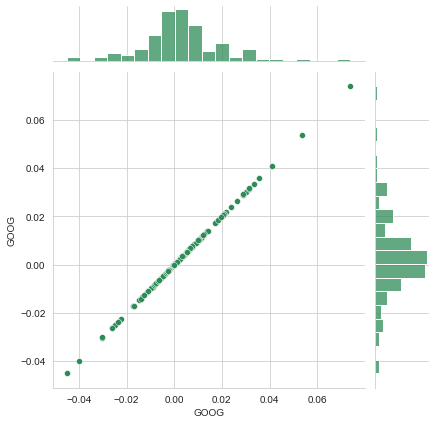

In [42]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

You can see how correlated two stocks are, use the .jointplot() function.

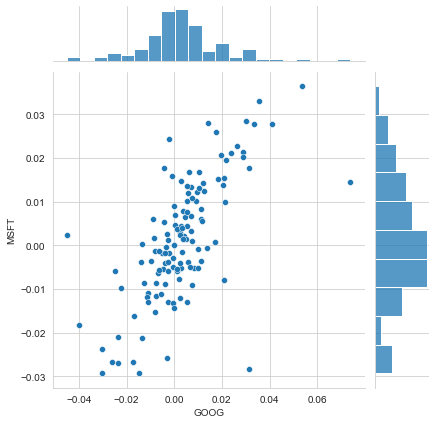

In [43]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter',dropna=True)

For reference, see the image below to determine how correlated the same variable for two different datasets are:

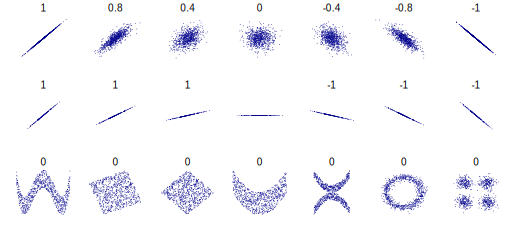

In [44]:
from IPython.display import SVG
SVG('http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

You can use .pairplots() in Seaborn to compare numerous variables to one another and combine those graphs into one big subplot.

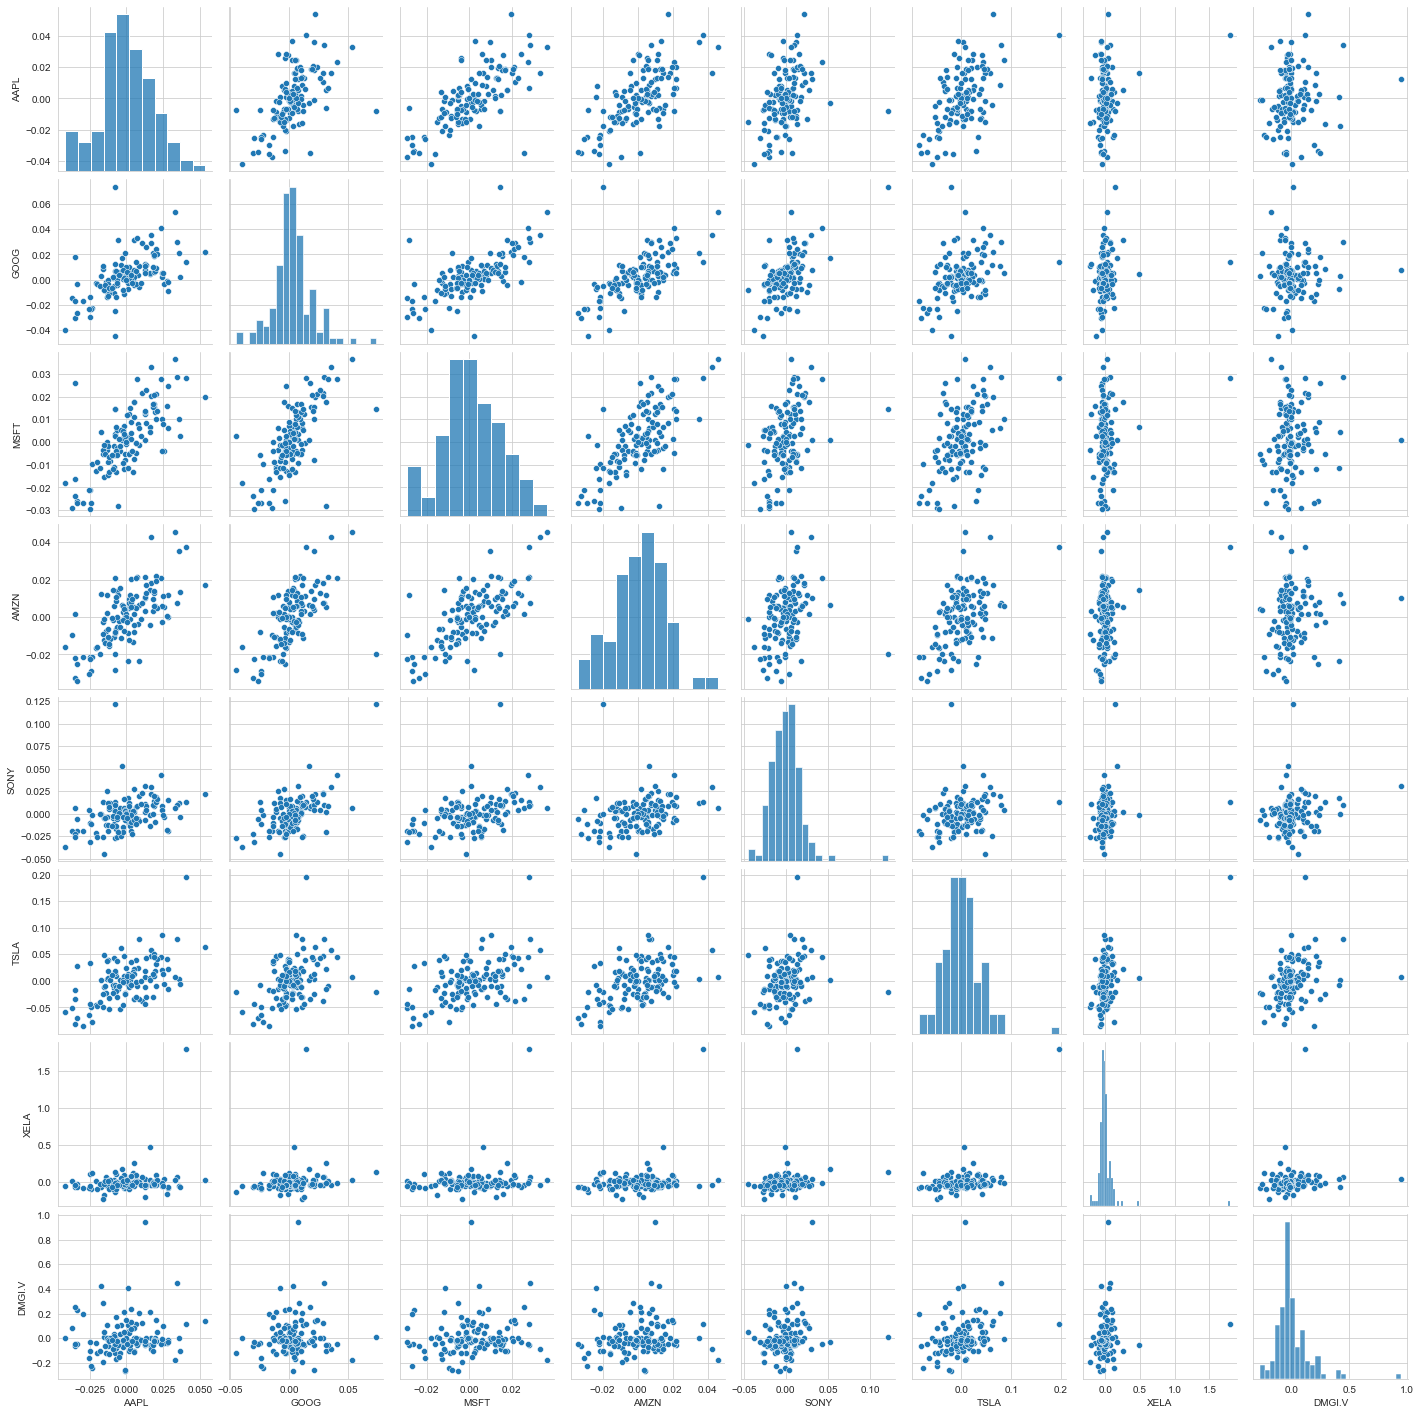

In [45]:
sns.pairplot(tech_rets.dropna())

You can look at the upper or lower portion of this paired grid to determine the correlation between any two columns in the tech_rets dataframe.

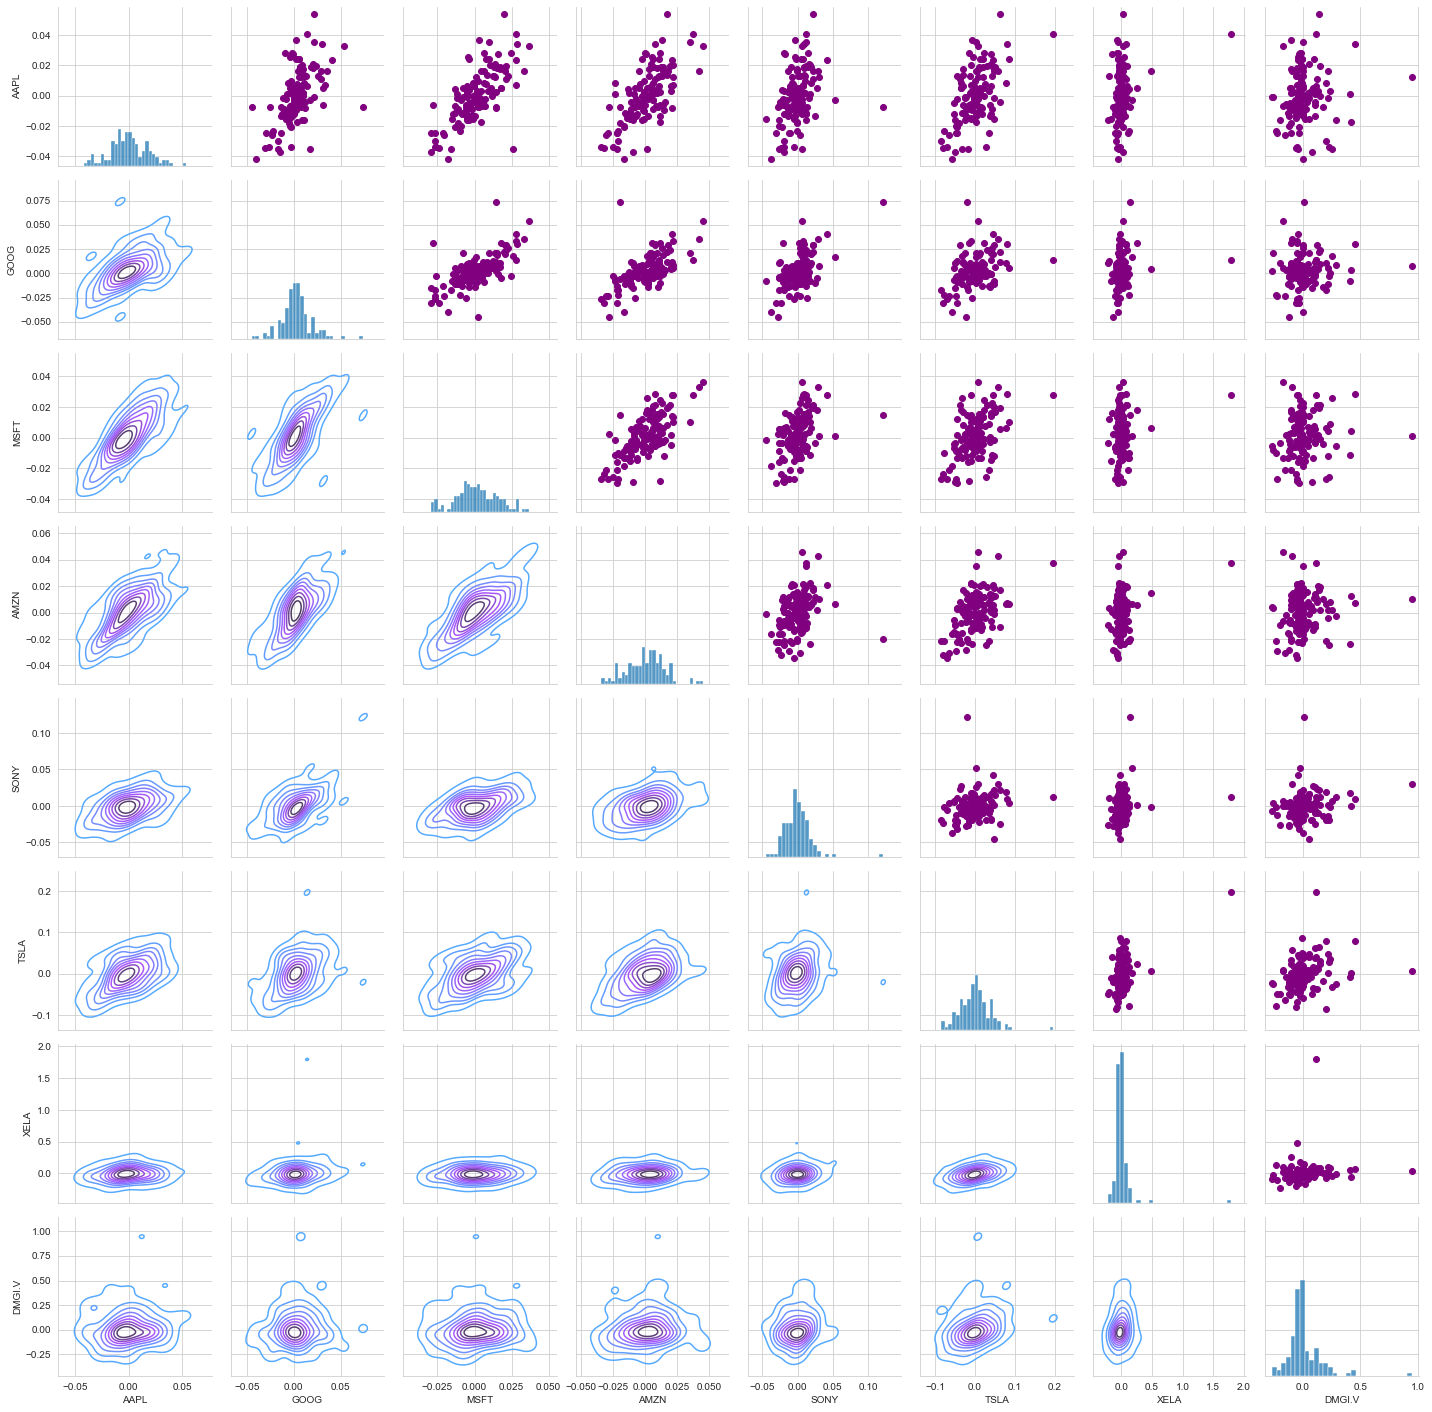

In [46]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(sns.histplot,bins=30)

Using sns.PairGrid() on a dataframe, you have control over what is displayed for the upper portion of the triangle with .map_upper(), the lower portion of the triangle with .map_lower(), and the diagonals of the grid with .map_diag().

In the PairGrid above, kernel density functions created the lower portion of the grid, scatter plots were created in the upper portion of the grid, and histograms were created for the diagonals of the grid.

Analyzing this information, it would appear that Microsoft and Amazon are the safest companies to invest in considering their daily returns are more likely to net a positive return on investments. There also seem to be strong correlations between Amazon and Microsoft, Amazon and Google, Amazon and Apple, Google and Microsoft, Apple and Microsoft, and Apple and Sony. There doesn't seem to be much correlation with Exela and any of the other technology companies. Similarly with DMGI.V.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

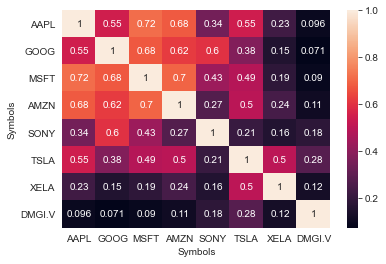

In [47]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

## What was the correlation between different stocks' closing price?

Now let's see what happens when we look at just the adjusted closing prices with the same PairGrid.

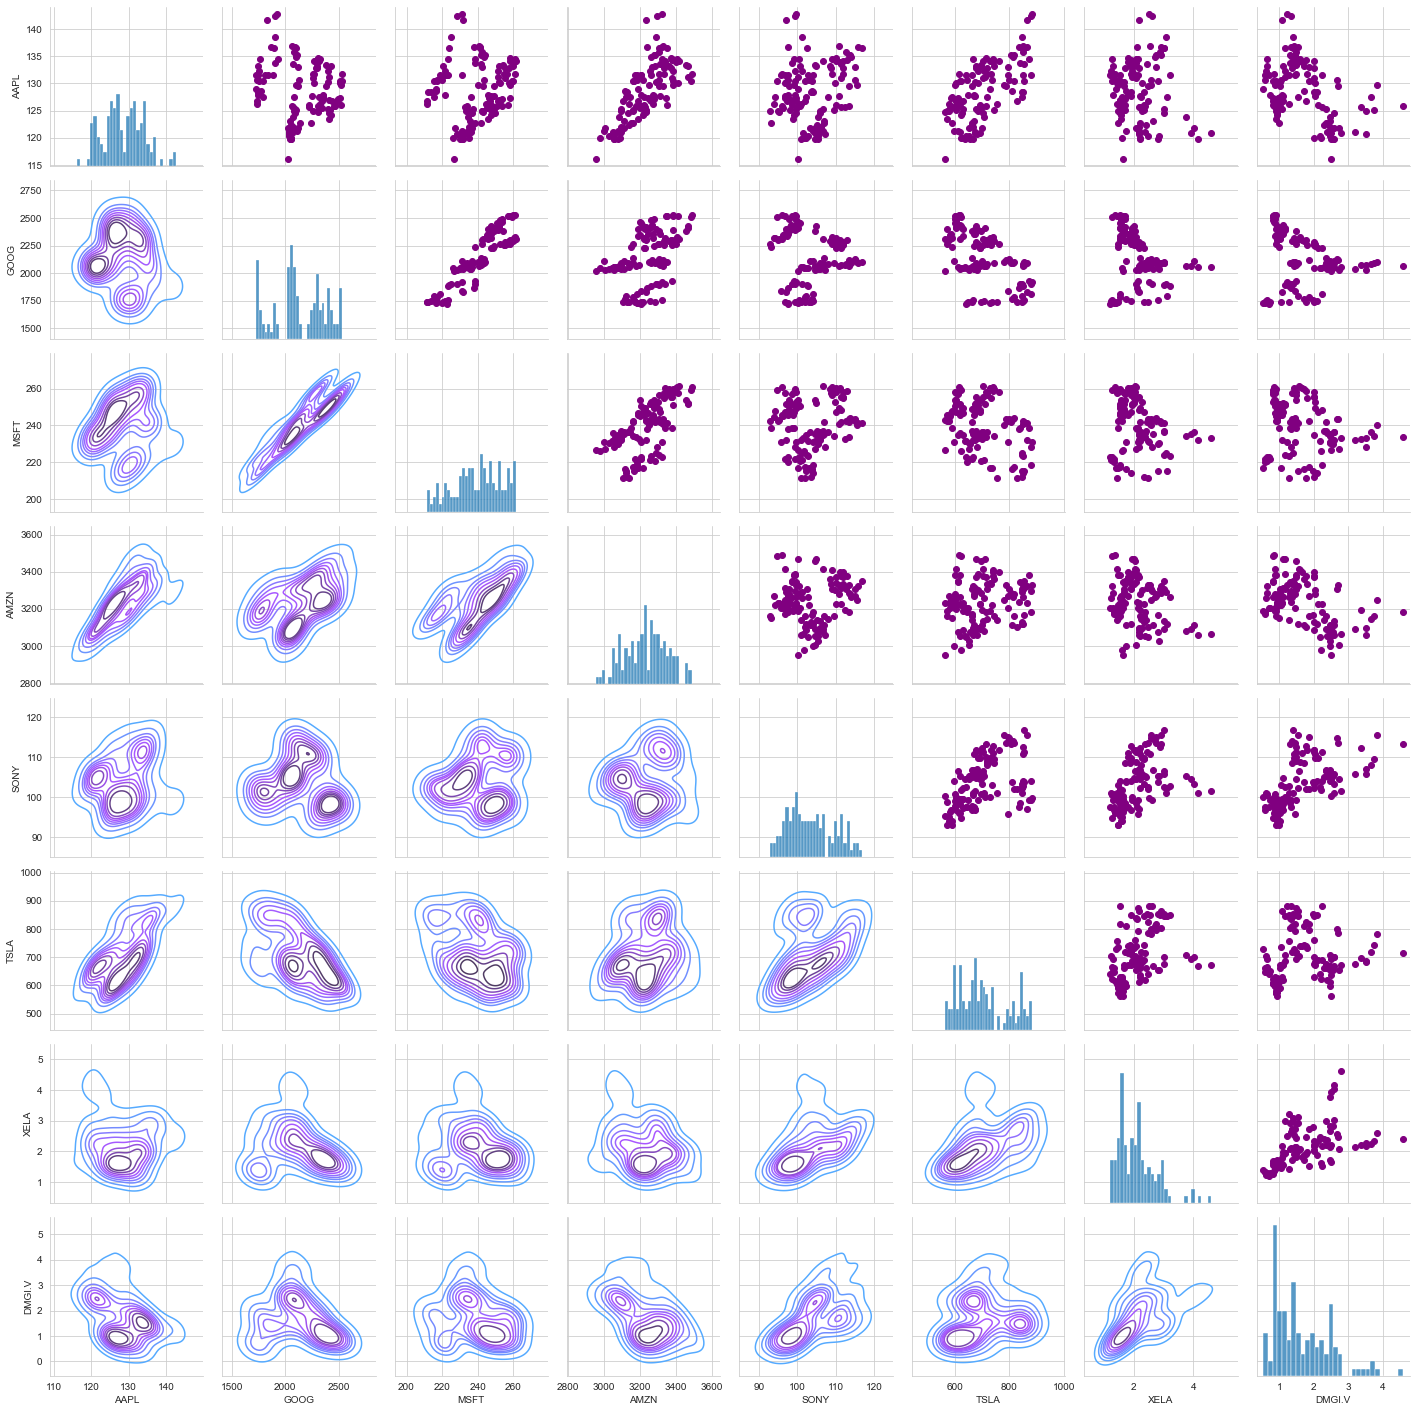

In [48]:
closing_fig = sns.PairGrid(closing_df.dropna())

closing_fig.map_upper(plt.scatter,color='purple')

closing_fig.map_lower(sns.kdeplot,cmap='cool_d')

closing_fig.map_diag(sns.histplot,bins=30)

Looking at this, the only strongly correlated relationships appear to be Google and Microsoft, and Apple and Amazon.

Let's make a correlation plot see how correlated the adjust closing prices are:

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

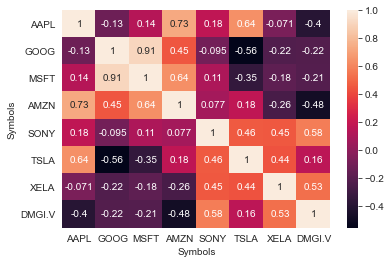

In [49]:
sns.heatmap(closing_df.corr(),annot=True)

It appears Amazon and Microsoft, and Apple and Tesla, also have a reasonably strong correlation with one another.

## How much value do we put at risk for a particular stock?

In [50]:
rets = tech_rets.dropna()
area=np.pi*16

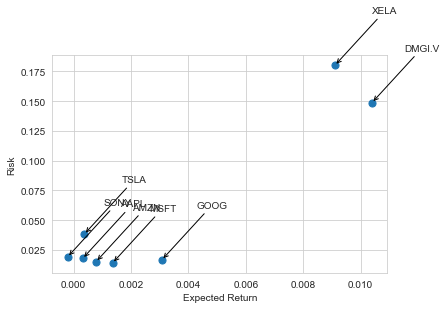

In [51]:
plt.scatter(x=rets.mean(),y=rets.std(),s=area)

#How to set the plot labels (only works on matplotlib.pyplot graphs)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Adding labels to scatter plots in matplotlib:
# See http://matplotlib.org/users/annotations_guide.html for more details
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label,xy = (x,y), xytext = (50,50),
                textcoords = 'offset points', ha='center',va='bottom',
                arrowprops = dict(arrowstyle = '->', 
                                  connectionstyle = 'arc3,rad=0',
                                 color='black'))
# zip allows you to call all of those elements at once.

As you can see XELA and DMGI.V are high risk, high reward companies to invest in. The companies with low risk and the best expected returns are as follows: Google, Microsoft, Amazon, and Apple. Tesla and Sony both appear to be relatively low risk, but seem to have very little expected returns on investment. 

Sidenote: Manually adjust where the xytext for the label is placed for a less cluttered labeling.

Let's define a value at risk parameter for our stocks. This can be done using quantiles ('bootstrap' method) from a histogram of daily returns or through using a Monte Carlo method.

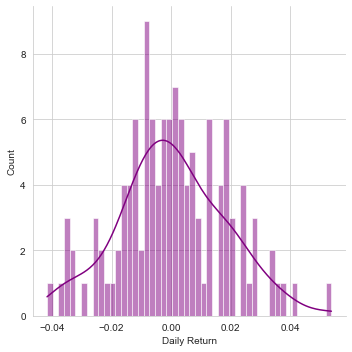

In [52]:
sns.displot(x=AAPL['Daily Return'].dropna(),bins=50,color='purple',kde=True)

In [53]:
rets['AAPL'].quantile(0.05)

-0.03288902604390809

In [54]:
rets['AAPL'].quantile(0.95)

0.028438784669895113

The 0.05 empirical quantile shows that with 95% confidence, our worst daily loss would not exceed 3.3% of your investment. Similarly, the 0.95 quantile shows that with 95% confidence, our best daily earnings will be a minimum of 2.8% of our investments.

That's how you you would analyze the daily returns to determine how much of a risk it would be to invest in a certain company. You could create a heatmap with the annotations on such that it contains this information for each of the companies you want to compare and use it for risk analysis.

### Value at Risk using the Monte Carlo Method

## What was the change in the stock's price over different time intervals?

This section was taken from Jose Portilla's file - "Data Project - Stock Market Analysis":

Using the Monte Carlo to run many trials with random market conditions, we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

                            Δ𝑆/𝑆=𝜇Δ𝑡+𝜎𝜖√Δ𝑡

Where S is the stock price, mu is the expected return (which we calculated earlier), sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

                            Δ𝑆=𝑆(𝜇*Δ𝑡+𝜎𝜖*√Δ𝑡)

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG.

In [55]:
# Number of days you wish to average over:
days = [30,60,180]

# Change in time
dt = []
for x in days:
    dt.append(1/x)

# Mean and standard deviation

mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [56]:
def stock_monte_carlo(start_price,days,x,mu,sigma):
   # Since days and dt are lists, you need to specify which index value, 
    # x, you want to use.
    
    price = np.zeros(days[x])
    price[0] = start_price
    
    shock = np.zeros(days[x])
    drift = np.zeros(days[x])
    
    for y in range(1,days[x]):
        shock[y] = np.random.normal(loc = mu*dt[x], 
                                    scale = sigma*np.sqrt(dt[x]))
        drift[y]= mu*dt[x]
        
        # The price is the previous price of the stock plus the change
        # in that stocks price.
        price[y] = price[y-1] + (price[y-1]*(drift[y]+shock[y]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis of Google over 30 day period')

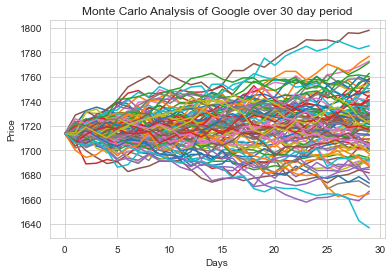

In [57]:
# Figure out Google's initial opening stock price is 
# and then plot the Monte Carlo simulation for a 30 day time period.

start_price = GOOG['Open'][0]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,0,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis of Google over 30 day period")

Now we can create a histogram that can help give some useful information from this simulation:

In [58]:
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,0,mu,sigma)[days[0]-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 30 days')

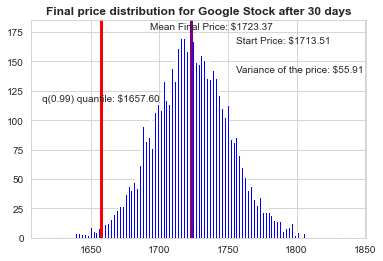

In [59]:
# Define the 1% empirical quantile:
q = np.percentile(simulations,1)

# Plot the distribution of the end prices:
plt.hist(simulations,bins=200,color='blue')

# Now use the plt.figtext to place useful information at meaningful positions on the graph

# Starting price:
plt.figtext(0.6,0.8,'Start Price: $%.2f' %start_price)

# Mean ending price:
plt.figtext(0.4,0.85,'Mean Final Price: $%.2f' %simulations.mean())

# Variance of the price (within 99% confidence interval):
plt.figtext(0.6,0.7,'Variance of the price: $%.2f' %(start_price - q))

# Display 1% quantile
plt.figtext(0.15,0.6,'q(0.99) quantile: $%.2f' %q)

# Plot line at the 1% quantile result, and at the mean:
plt.axvline(x=q,linewidth=3,color='r')
plt.axvline(x=simulations.mean(),linewidth=3,color='purple')

# Title:
plt.title('Final price distribution for Google Stock after %s days' %days[0], weight = 'bold')

Now let's see what this simulation predics after a 60 day period:

Text(0.5, 1.0, 'Monte Carlo Analysis of Google over 60 day period')

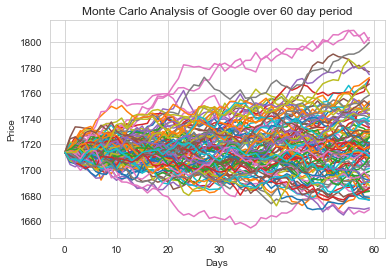

In [60]:
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,1,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis of Google over 60 day period")

In [61]:
simulations2 = np.zeros(runs)

for run in range(runs):
    simulations2[run] = stock_monte_carlo(start_price,days,1,mu,sigma)[days[1]-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 60 days')

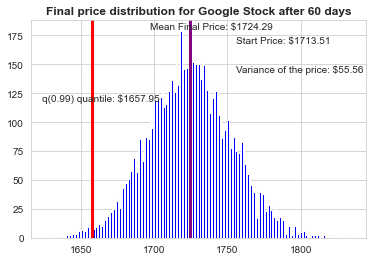

In [62]:
# Define the 1% empirical quantile:
q = np.percentile(simulations2,1)

# Plot the distribution of the end prices:
plt.hist(simulations2,bins=200,color='blue')

# Now use the plt.figtext to place useful information at meaningful positions on the graph

# Starting price:
plt.figtext(0.6,0.8,'Start Price: $%.2f' %start_price)

# Mean ending price:
plt.figtext(0.4,0.85,'Mean Final Price: $%.2f' %simulations2.mean())

# Variance of the price (within 99% confidence interval):
plt.figtext(0.6,0.7,'Variance of the price: $%.2f' %(start_price - q))

# Display 1% quantile
plt.figtext(0.15,0.6,'q(0.99) quantile: $%.2f' %q)

# Plot line at the 1% quantile result, and at the mean:
plt.axvline(x=q,linewidth=3,color='r')
plt.axvline(x=simulations2.mean(),linewidth=3,color='purple')

# Title:
plt.title('Final price distribution for Google Stock after %s days' %days[1], weight = 'bold')

How about after 180 days?

Text(0.5, 1.0, 'Monte Carlo Analysis of Google over 180 day period')

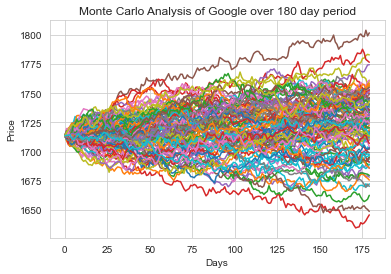

In [63]:
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,2,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis of Google over 180 day period")

In [64]:
simulations3 = np.zeros(runs)

for run in range(runs):
    simulations3[run] = stock_monte_carlo(start_price,days,2,mu,sigma)[days[2]-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 180 days')

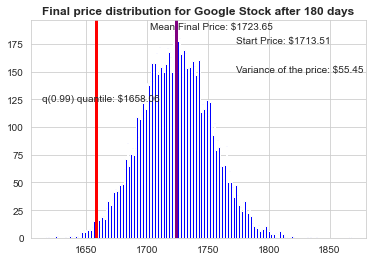

In [65]:
# Define the 1% empirical quantile:
q = np.percentile(simulations3,1)

# Plot the distribution of the end prices:
plt.hist(simulations3,bins=200,color='blue')

# Now use the plt.figtext to place useful information at meaningful positions on the graph

# Starting price:
plt.figtext(0.6,0.8,'Start Price: $%.2f' %start_price)

# Mean ending price:
plt.figtext(0.4,0.85,'Mean Final Price: $%.2f' %simulations3.mean())

# Variance of the price (within 99% confidence interval):
plt.figtext(0.6,0.7,'Variance of the price: $%.2f' %(start_price - q))

# Display 1% quantile
plt.figtext(0.15,0.6,'q(0.99) quantile: $%.2f' %q)

# Plot line at the 1% quantile result, and at the mean:
plt.axvline(x=q,linewidth=3,color='r')
plt.axvline(x=simulations3.mean(),linewidth=3,color='purple')

# Title:
plt.title('Final price distribution for Google Stock after %s days' %days[2], weight = 'bold')

These show you that even a 3 to 6 times the amount of days, the mean final price are practically identical, with a few tens of cents separating them. 

The variance in the price indicates that 99% of the time, the worst you could lose in your investment is 56.45, 54.76, and 54.88 dollars per stock within 30, 60 and 180 days, respectively.

On average, you would make roughly $10 per stock in profit. The distribution doesn't appear to be skewed, so this seems like a reasonable investment with low risk (when comparing the worst lose total to the initial investment starting price). 

## Change in Sony's price over various time intervals:

In [66]:
tech_list

['AAPL', 'GOOG', 'MSFT', 'AMZN', 'SONY', 'TSLA', 'XELA', 'DMGI.V']

Text(0.5, 1.0, 'Monte Carlo Analysis of Sony over 30 day period')

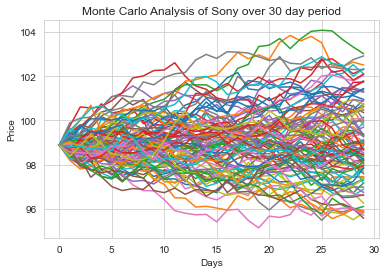

In [78]:
# Figure out what Sony's initial opening stock price is 
# and then plot the Monte Carlo simulation for a 30 day time period.

start_price_sony = SONY['Open'][0]
mu_sony = rets.mean()['SONY']
sigma_sony = rets.std()['SONY']

for run in range(100):
    plt.plot(stock_monte_carlo(start_price_sony,days,0,mu_sony,sigma_sony))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis of Sony over 30 day period")

Text(0.5, 1.0, 'Final price distribution for Sony Stock after 30 days')

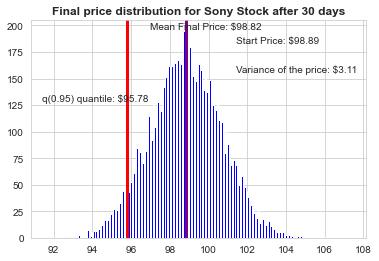

In [79]:
runs=10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price_sony,days,0,mu_sony,sigma_sony)[days[0]-1]
    
# Define the 5% empirical quantile:
q_sony = np.percentile(simulations,5)

# Plot the distribution of the end prices:
plt.hist(simulations,bins=200,color='blue')

# Now use the plt.figtext to place useful information at meaningful positions on the graph

# Starting price:
plt.figtext(0.6,0.8,'Start Price: $%.2f' %start_price_sony)

# Mean ending price:
plt.figtext(0.4,0.85,'Mean Final Price: $%.2f' %simulations.mean())

# Variance of the price (within 95% confidence interval):
plt.figtext(0.6,0.7,'Variance of the price: $%.2f' %(start_price_sony - q_sony))

# Display 5% quantile
plt.figtext(0.15,0.6,'q(0.95) quantile: $%.2f' %q_sony)

# Plot line at the 5% quantile result, and at the mean:
plt.axvline(x=q_sony,linewidth=3,color='r')
plt.axvline(x=simulations.mean(),linewidth=3,color='purple')

# Title:
plt.title('Final price distribution for Sony Stock after %s days' %days[0], weight = 'bold')

Text(0.5, 1.0, 'Monte Carlo Analysis of Sony over 60 day period')

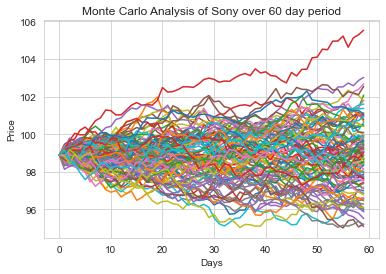

In [80]:
# Figure out what Sony's initial opening stock price is 
# and then plot the Monte Carlo simulation for a 60 day time period.

start_price_sony = SONY['Open'][0]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price_sony,days,1,mu_sony,sigma_sony))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis of Sony over 60 day period")

Text(0.5, 1.0, 'Final price distribution for Sony Stock after 60 days')

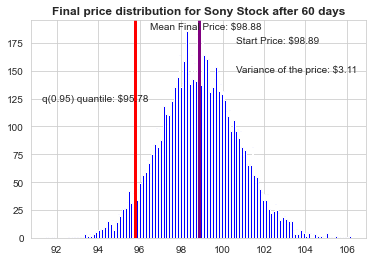

In [81]:
runs=10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price_sony,days,1,mu_sony,sigma_sony)[days[1]-1]
    
# Define the 5% empirical quantile:
q_sony = np.percentile(simulations,5)

# Plot the distribution of the end prices:
plt.hist(simulations,bins=200,color='blue')

# Now use the plt.figtext to place useful information at meaningful positions on the graph

# Starting price:
plt.figtext(0.6,0.8,'Start Price: $%.2f' %start_price_sony)

# Mean ending price:
plt.figtext(0.4,0.85,'Mean Final Price: $%.2f' %simulations.mean())

# Variance of the price (within 95% confidence interval):
plt.figtext(0.6,0.7,'Variance of the price: $%.2f' %(start_price_sony - q_sony))

# Display 5% quantile
plt.figtext(0.15,0.6,'q(0.95) quantile: $%.2f' %q_sony)

# Plot line at the 5% quantile result, and at the mean:
plt.axvline(x=q_sony,linewidth=3,color='r')
plt.axvline(x=simulations.mean(),linewidth=3,color='purple')

# Title:
plt.title('Final price distribution for Sony Stock after %s days' %days[1], weight = 'bold')

Text(0.5, 1.0, 'Monte Carlo Analysis of Sony over 1800 day period')

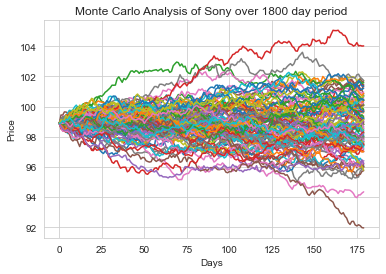

In [82]:
# Figure out what Sony's initial opening stock price is 
# and then plot the Monte Carlo simulation for a 180 day time period.

start_price_sony = SONY['Open'][0]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price_sony,days,2,mu_sony,sigma_sony))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis of Sony over 1800 day period")

Text(0.5, 1.0, 'Final price distribution for Sony Stock after 180 days')

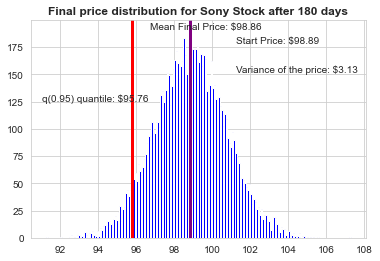

In [83]:
runs=10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price_sony,days,2,mu_sony,sigma_sony)[days[2]-1]
    
# Define the 5% empirical quantile:
q_sony = np.percentile(simulations,5)

# Plot the distribution of the end prices:
plt.hist(simulations,bins=200,color='blue')

# Now use the plt.figtext to place useful information at meaningful positions on the graph

# Starting price:
plt.figtext(0.6,0.8,'Start Price: $%.2f' %start_price_sony)

# Mean ending price:
plt.figtext(0.4,0.85,'Mean Final Price: $%.2f' %simulations.mean())

# Variance of the price (within 95% confidence interval):
plt.figtext(0.6,0.7,'Variance of the price: $%.2f' %(start_price_sony - q_sony))

# Display 5% quantile
plt.figtext(0.15,0.6,'q(0.95) quantile: $%.2f' %q_sony)

# Plot line at the 5% quantile result, and at the mean:
plt.axvline(x=q_sony,linewidth=3,color='r')
plt.axvline(x=simulations.mean(),linewidth=3,color='purple')

# Title:
plt.title('Final price distribution for Sony Stock after %s days' %days[2], weight = 'bold')

Not much variation in the price after 30, 60, or 180 days. The variance for each is relatively small compared to the starting price, and the average final price is generally losing a few cents per stock, suggesting this is a low risk investment with very little hopes of winning big off this stock. 

Once their supply chains are no longer affected by the pandemic, this stock will most likely rise due to sales of the PS5. It would probably be better to invest in the company a month or two from now.

## What is the change in Exela's stock price over different time intervals?

I think it would be interesting to look at a smaller companies stock prices, so let's see what a Monte Carlo simulation looks like for a smaller company:

Text(0.5, 1.0, 'Monte Carlo Analysis of Exela over 30 day period')

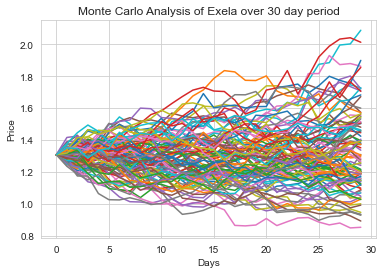

In [88]:
# Figure out what Exela's initial opening stock price is 
# and then plot the Monte Carlo simulation for a 30 day time period.

start_price_xela = XELA['Open'][0]
mu_xela = rets.mean()['XELA']
sigma_xela = rets.std()['XELA']

for run in range(100):
    plt.plot(stock_monte_carlo(start_price_xela,days,0,mu_xela,sigma_xela))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis of Exela over 30 day period")

Text(0.5, 1.0, 'Final price distribution for Exela Stock after 30 days')

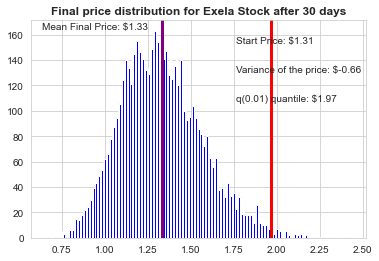

In [100]:
runs=10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price_xela,days,0,mu_xela,sigma_xela)[days[0]-1]
    
# Define the 99% empirical quantile:
q_xela = np.percentile(simulations,99)

# Plot the distribution of the end prices:
plt.hist(simulations,bins=200,color='blue')

# Now use the plt.figtext to place useful information at meaningful positions on the graph

# Starting price:
plt.figtext(0.6,0.8,'Start Price: $%.2f' %start_price_xela)

# Mean ending price:
plt.figtext(0.15,0.85,'Mean Final Price: $%.2f' %simulations.mean())

# Variance of the price (within 99% confidence interval):
plt.figtext(0.6,0.7,'Variance of the price: $%.2f' %(start_price_xela - q_xela))

# Display 99% quantile
plt.figtext(0.6,0.6,'q(0.01) quantile: $%.2f' %q_xela)

# Plot line at the 99% quantile result, and at the mean:
plt.axvline(x=q_xela,linewidth=3,color='r')
plt.axvline(x=simulations.mean(),linewidth=3,color='purple')

# Title:
plt.title('Final price distribution for Exela Stock after %s days' %days[0], weight = 'bold')

Text(0.5, 1.0, 'Monte Carlo Analysis of Exela over 60 day period')

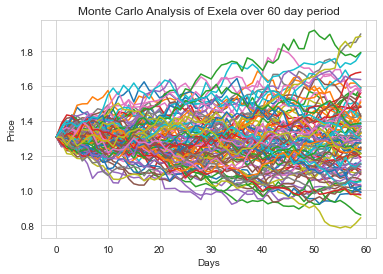

In [89]:
# Figure out what Exela's initial opening stock price is 
# and then plot the Monte Carlo simulation for a 60 day time period.

start_price_xela = XELA['Open'][0]
mu_xela = rets.mean()['XELA']
sigma_xela=rets.std()['XELA']

for run in range(100):
    plt.plot(stock_monte_carlo(start_price_xela,days,1,mu_xela,sigma_xela))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis of Exela over 60 day period")

Text(0.5, 1.0, 'Final price distribution for Exela Stock after 60 days')

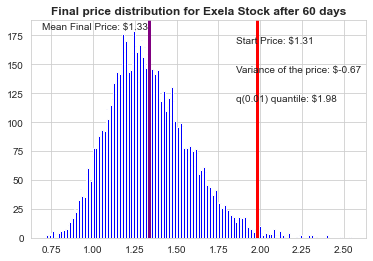

In [101]:
runs=10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price_xela,days,1,mu_xela,sigma_xela)[days[1]-1]
    
# Define the 99% empirical quantile:
q_xela = np.percentile(simulations,99)

# Plot the distribution of the end prices:
plt.hist(simulations,bins=200,color='blue')

# Now use the plt.figtext to place useful information at meaningful positions on the graph

# Starting price:
plt.figtext(0.6,0.8,'Start Price: $%.2f' %start_price_xela)

# Mean ending price:
plt.figtext(0.15,0.85,'Mean Final Price: $%.2f' %simulations.mean())

# Variance of the price (within 99% confidence interval):
plt.figtext(0.6,0.7,'Variance of the price: $%.2f' %(start_price_xela - q_xela))

# Display 99% quantile
plt.figtext(0.6,0.6,'q(0.01) quantile: $%.2f' %q_xela)

# Plot line at the 99% quantile result, and at the mean:
plt.axvline(x=q_xela,linewidth=3,color='r')
plt.axvline(x=simulations.mean(),linewidth=3,color='purple')

# Title:
plt.title('Final price distribution for Exela Stock after %s days' %days[1], weight = 'bold')

Text(0.5, 1.0, 'Monte Carlo Analysis of Exela over 180 day period')

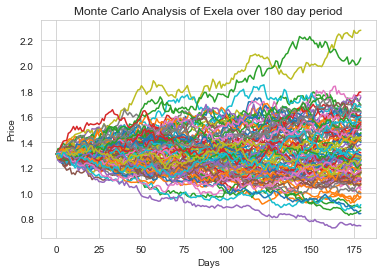

In [90]:
# Figure out what Exela's initial opening stock price is 
# and then plot the Monte Carlo simulation for a 180 day time period.

start_price_xela = XELA['Open'][0]
mu_xela = rets.mean()['XELA']
sigma_xela=rets.std()['XELA']

for run in range(100):
    plt.plot(stock_monte_carlo(start_price_xela,days,2,mu_xela,sigma_xela))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis of Exela over 180 day period")

Text(0.5, 1.0, 'Final price distribution for Exela Stock after 180 days')

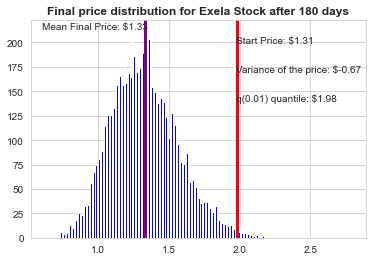

In [102]:
runs=10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price_xela,days,2,mu_xela,sigma_xela)[days[2]-1]
    
# Define the 99% empirical quantile:
q_xela = np.percentile(simulations,99)

# Plot the distribution of the end prices:
plt.hist(simulations,bins=200,color='blue')

# Now use the plt.figtext to place useful information at meaningful positions on the graph

# Starting price:
plt.figtext(0.6,0.8,'Start Price: $%.2f' %start_price_xela)

# Mean ending price:
plt.figtext(0.15,0.85,'Mean Final Price: $%.2f' %simulations.mean())

# Variance of the price (within 99% confidence interval):
plt.figtext(0.6,0.7,'Variance of the price: $%.2f' %(start_price_xela - q_xela))

# Display 99% quantile
plt.figtext(0.6,0.6,'q(0.01) quantile: $%.2f' %q_xela)

# Plot line at the 99% quantile result, and at the mean:
plt.axvline(x=q_xela,linewidth=3,color='r')
plt.axvline(x=simulations.mean(),linewidth=3,color='purple')

# Title:
plt.title('Final price distribution for Exela Stock after %s days' %days[2], weight = 'bold')

As we can see, the variation in the price with respect to the starting price is much greater this time. The average price per stock is generally 2 cents higher than the starting price, for each time interval. 

This is a high-risk investment with very small returns on investment with a distribution that appears to be positively skewed (which means you're more likely to lose money than make money by investing in this company).

## What is the change in DMGI.V's stock price over different time intervals?

Seeing that Exela's stock doesn't seem to be a safe investment, let's look at DMGI.V:

Text(0.5, 1.0, 'Monte Carlo Analysis of DMGI.V over 30 day period')

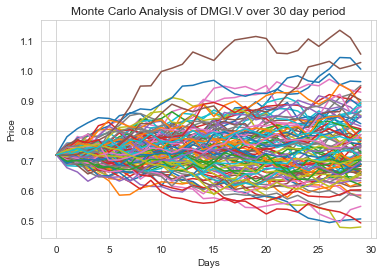

In [104]:
# Figure out what DMGI.V's initial opening stock price is 
# and then plot the Monte Carlo simulation for a 30 day time period.

start_price_dmgi = DMGI['DMGI.V'][0]
mu_dmgi = rets.mean()['DMGI.V']
sigma_dmgi = rets.std()['DMGI.V']

for run in range(100):
    plt.plot(stock_monte_carlo(start_price_dmgi,days,0,mu_dmgi,sigma_dmgi))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis of DMGI.V over 30 day period")

Text(0.5, 1.0, 'Final price distribution for DMGI.V Stock after 30 days')

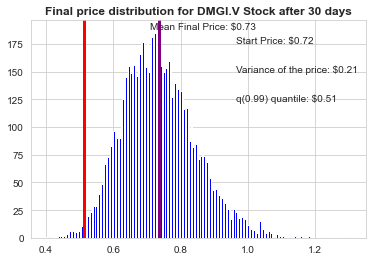

In [114]:
runs=10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price_dmgi,days,0,mu_dmgi,sigma_dmgi)[days[0]-1]

# Define the 1% empirical quantile:
q_dmgi = np.percentile(simulations,1)

# Plot the distribution of the end prices:
plt.hist(simulations,bins=200,color='blue')

# Now use the plt.figtext to place useful information at meaningful positions on the graph

# Starting price:
plt.figtext(0.6,0.8,'Start Price: $%.2f' %start_price_dmgi)

# Mean ending price:
plt.figtext(0.4,0.85,'Mean Final Price: $%.2f' %simulations.mean())

# Variance of the price (within 99% confidence interval):
plt.figtext(0.6,0.7,'Variance of the price: $%.2f' %(start_price_dmgi - q_dmgi))

# Display 1% quantile
plt.figtext(0.6,0.6,'q(0.99) quantile: $%.2f' %q_dmgi)

# Plot line at the 1% quantile result, and at the mean:
plt.axvline(x=q_dmgi,linewidth=3,color='r')
plt.axvline(x=simulations.mean(),linewidth=3,color='purple')

# Title:
plt.title('Final price distribution for DMGI.V Stock after %s days' %days[0], weight = 'bold')

Text(0.5, 1.0, 'Monte Carlo Analysis of DMGI.V over 60 day period')

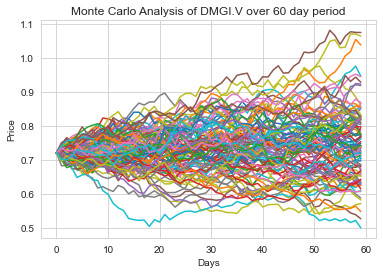

In [110]:
# Figure out what DMGI.V's initial opening stock price is 
# and then plot the Monte Carlo simulation for a 60 day time period.

start_price_dmgi = DMGI['DMGI.V'][0]
mu_dmgi = rets.mean()['DMGI.V']
sigma_dmgi = rets.std()['DMGI.V']

for run in range(100):
    plt.plot(stock_monte_carlo(start_price_dmgi,days,1,mu_dmgi,sigma_dmgi))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis of DMGI.V over 60 day period")

Text(0.5, 1.0, 'Final price distribution for DMGI.V Stock after 60 days')

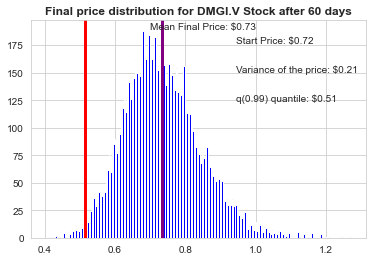

In [112]:
runs=10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price_dmgi,days,1,mu_dmgi,sigma_dmgi)[days[1]-1]

# Define the 1% empirical quantile:
q_dmgi = np.percentile(simulations,1)

# Plot the distribution of the end prices:
plt.hist(simulations,bins=200,color='blue')

# Now use the plt.figtext to place useful information at meaningful positions on the graph

# Starting price:
plt.figtext(0.6,0.8,'Start Price: $%.2f' %start_price_dmgi)

# Mean ending price:
plt.figtext(0.4,0.85,'Mean Final Price: $%.2f' %simulations.mean())

# Variance of the price (within 99% confidence interval):
plt.figtext(0.6,0.7,'Variance of the price: $%.2f' %(start_price_dmgi - q_dmgi))

# Display 1% quantile
plt.figtext(0.6,0.6,'q(0.99) quantile: $%.2f' %q_dmgi)

# Plot line at the 1% quantile result, and at the mean:
plt.axvline(x=q_dmgi,linewidth=3,color='r')
plt.axvline(x=simulations.mean(),linewidth=3,color='purple')

# Title:
plt.title('Final price distribution for DMGI.V Stock after %s days' %days[1], weight = 'bold')

Text(0.5, 1.0, 'Monte Carlo Analysis of DMGI.V over 180 day period')

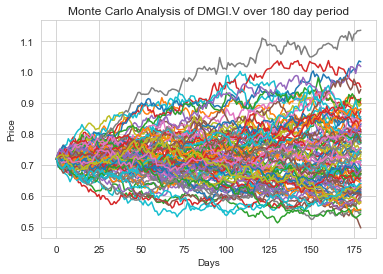

In [106]:
# Figure out what DMGI.V's initial opening stock price is 
# and then plot the Monte Carlo simulation for a 30 day time period.

start_price_dmgi = DMGI['DMGI.V'][0]
mu_dmgi = rets.mean()['DMGI.V']
sigma_dmgi = rets.std()['DMGI.V']

for run in range(100):
    plt.plot(stock_monte_carlo(start_price_dmgi,days,2,mu_dmgi,sigma_dmgi))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis of DMGI.V over 180 day period")

Text(0.5, 1.0, 'Final price distribution for DMGI.V Stock after 180 days')

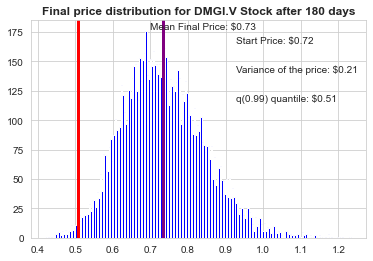

In [115]:
runs=10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price_dmgi,days,2,mu_dmgi,sigma_dmgi)[days[2]-1]

# Define the 1% empirical quantile:
q_dmgi = np.percentile(simulations,1)

# Plot the distribution of the end prices:
plt.hist(simulations,bins=200,color='blue')

# Now use the plt.figtext to place useful information at meaningful positions on the graph

# Starting price:
plt.figtext(0.6,0.8,'Start Price: $%.2f' %start_price_dmgi)

# Mean ending price:
plt.figtext(0.4,0.85,'Mean Final Price: $%.2f' %simulations.mean())

# Variance of the price (within 99% confidence interval):
plt.figtext(0.6,0.7,'Variance of the price: $%.2f' %(start_price_dmgi - q_dmgi))

# Display 1% quantile
plt.figtext(0.6,0.6,'q(0.99) quantile: $%.2f' %q_dmgi)

# Plot line at the 1% quantile result, and at the mean:
plt.axvline(x=q_dmgi,linewidth=3,color='r')
plt.axvline(x=simulations.mean(),linewidth=3,color='purple')

# Title:
plt.title('Final price distribution for DMGI.V Stock after %s days' %days[2], weight = 'bold')

The variables we checked for each of these graphs are identical, suggesting this is a reasonable estimate for what to expect from this company's stock prices. Similarly to Exela, these histograms are positively skewed and a relatively high variation-to-initial price ratio, showing why investing in smaller companies can be such a risky proposition.